In [16]:
# 패키지 로드 및 데이터 불러오기
import pandas as pd
df = pd.read_csv("C:/Users/Awesomemin/Desktop/연구아카이브/Time_Series_with_Python/data/jj.csv")

In [17]:
# 불러온 데이터 윗부분 미리보기
df.head(10) ## 디폴트는 다섯개 보여주는데 괄호 안에 숫자 넣으면 그 개수만큼 보여줌ㅇㅇ

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
5,1961-04-02,0.69
6,1961-07-02,0.92
7,1961-10-01,0.55
8,1962-01-01,0.72
9,1962-04-02,0.77


In [18]:
# 아랫부분 미리보기
df.tail(4) ## 얘도 head 메서드와 똑같이 괄호 안에 숫자넣으면 그 갯수만큼 보여주고, 디폴트는 위와 동일하게 5개를 보여줌

,date,data
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


In [20]:
# 데이터셋을 훈련 set과 테스트 set으로 분할하기 
train = df[:-4] ## 1960년부터 1979년까지 분기별 EPS
test = df[-4:] ## 1980년 분기별 EPS

In [23]:
# 과거 평균기반 베이스라인 모델 구현하기 
import numpy as np

historical_mean = np.mean(train['data'])
print(historical_mean) ## 1960년 1분기부터 1979년 4분기까지 분기별 EPS는 평균적으로 약 4.31달러이다.

4.308499987499999


In [29]:
# MAPE 함수 구현해보기 (평균절대백분율오차)

test.loc[:, 'pred_mean'] = historical_mean ## 과거의 평균을 예측값으로 설정한다.
test

C:\Users\Awesomemin\AppData\Local\Temp\ipykernel_7728\2757564881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean'] = historical_mean


,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


In [30]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [32]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
print(mape_hist_mean) ## 베이스라인 모델의 예측값이 1980년에 관측된 분기별 EPS 실제값에 비해 평균적으로 70% 정도 벗어남

70.00752579965119


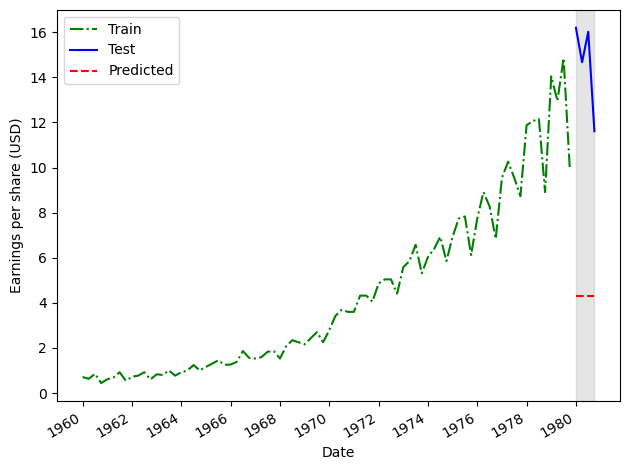

In [36]:
# 예측 시각화하기 (Baseline Model)
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label = 'Train')
ax.plot(test['date'], test['data'], 'b-', label = 'Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label = 'Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color = '#808080', alpha = 0.2)
ax.legend(loc = 2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()

In [40]:
# 새로운 베이스라인 모델: 작년의 평균으로 예측하기 
last_year_mean = np.mean(train.data[-4:])
last_year_mean ## 작년 분기별 EPS 평균은 12.96

12.96

In [43]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean ## 작년의 분기별 EPS 평균을 예측값으로 지정
test

C:\Users\Awesomemin\AppData\Local\Temp\ipykernel_7728\1307136582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred__last_yr_mean'] = last_year_mean ## 작년의 분기별 EPS 평균을 예측값으로 지정


,date,data,pred_mean,pred__last_yr_mean
80,1980-01-01,16.20,4.3085,12.96
81,1980-04-01,14.67,4.3085,12.96
82,1980-07-02,16.02,4.3085,12.96
83,1980-10-01,11.61,4.3085,12.96


In [45]:
mape_last_year_mean = mape(test['data'], test['pred__last_yr_mean'])
print(mape_last_year_mean) ## 약 15.60%의 MAPE: 예측값과 1980년도에 관측된 각 분기별 EPS가 평균적으로 약 15.6% 벗어나 있다.

15.5963680725103


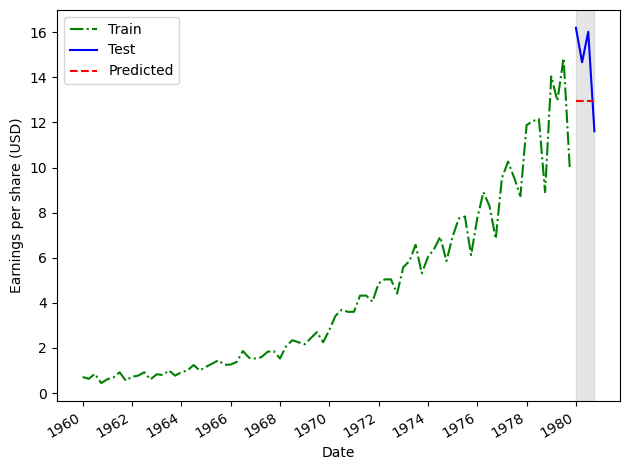

In [47]:
# 두 번째 베이스라인 시각화하기
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label = 'Train')
ax.plot(test['date'], test['data'], 'b-', label = 'Test')
ax.plot(test['date'], test['pred__last_yr_mean'], 'r--', label = 'Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color = '#808080', alpha = 0.2)
ax.legend(loc = 2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()

In [49]:
# 세 번째 베이스라인 모델: 마지막으로 측정된 값
last = train.data.iloc[-1]
print(last)

9.99


In [52]:
test.loc[:, 'pred_last'] = last ## 1979년 4분기의 EPS를 예측값으로 설정 
test

C:\Users\Awesomemin\AppData\Local\Temp\ipykernel_7728\2216057121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last'] = last ## 1979년 4분기의 EPS를 예측값으로 설정


,date,data,pred_mean,pred__last_yr_mean,pred_last
80,1980-01-01,16.20,4.3085,12.96,9.99
81,1980-04-01,14.67,4.3085,12.96,9.99
82,1980-07-02,16.02,4.3085,12.96,9.99
83,1980-10-01,11.61,4.3085,12.96,9.99


In [54]:
mape_last = mape(test['data'], test['pred_last'])
print(mape_last) ## 1979년 4분기의 EPS를 예측값으로 사용하면 실제값이랑 평균적으로 약 30.46% 벗어나 있다.

30.457277908606535


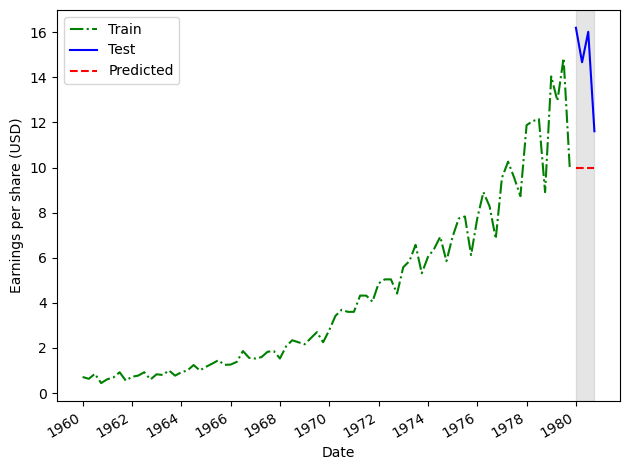

In [55]:
# 세 번째 베이스라인 시각화하기
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label = 'Train')
ax.plot(test['date'], test['data'], 'b-', label = 'Test')
ax.plot(test['date'], test['pred_last'], 'r--', label = 'Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color = '#808080', alpha = 0.2)
ax.legend(loc = 2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()

In [56]:
# 네 번째 베이스라인 모델: 단순한 계절적 예측 (마지막으로 측정된 주기가 미래에도 반복될 것이다)
## test data set에서 마지막 4개 값을 가져오 후, 1980년의 분기들에 순서대로 값을 할당하는 방식
test.loc[:, 'pred_last_season'] = train['data'][-4:].values
test

C:\Users\Awesomemin\AppData\Local\Temp\ipykernel_7728\4047858319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last_season'] = train['data'][-4:].values


,date,data,pred_mean,pred__last_yr_mean,pred_last,pred_last_season
80,1980-01-01,16.20,4.3085,12.96,9.99,14.04
81,1980-04-01,14.67,4.3085,12.96,9.99,12.96
82,1980-07-02,16.02,4.3085,12.96,9.99,14.85
83,1980-10-01,11.61,4.3085,12.96,9.99,9.99


In [59]:
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
print(mape_naive_seasonal)

11.561658552433654


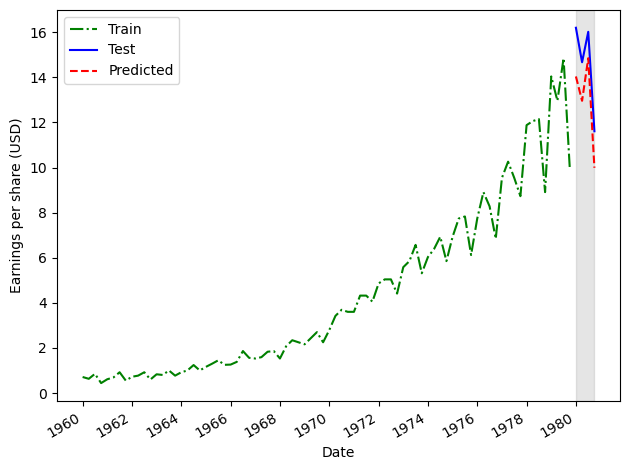

In [60]:
# 네 번째 베이스라인 시각화하기
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label = 'Train')
ax.plot(test['date'], test['data'], 'b-', label = 'Test')
ax.plot(test['date'], test['pred_last_season'], 'r--', label = 'Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color = '#808080', alpha = 0.2)
ax.legend(loc = 2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()

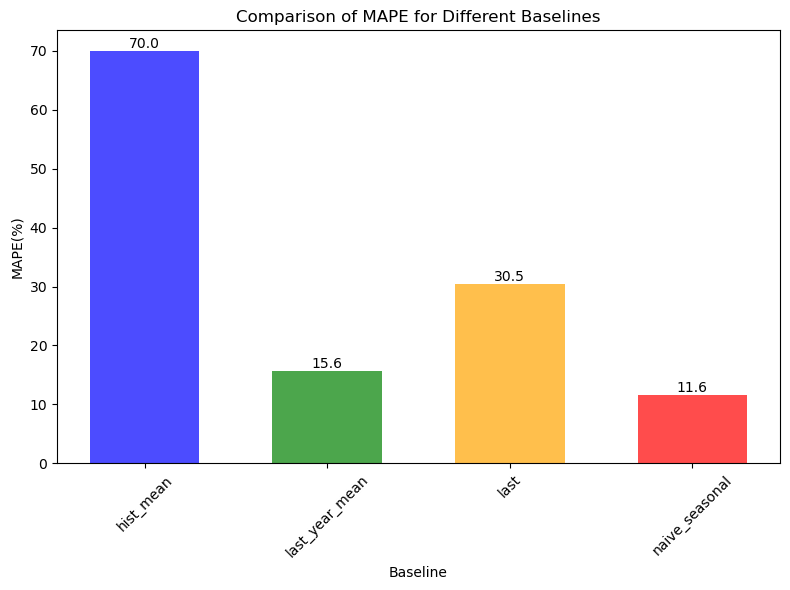

In [63]:
# 히스토그램으로 4개의 베이스라인 모델에 대한 MAPE 히스토그램  
import numpy as np
import matplotlib.pyplot as plt

# 변수 이름과 데이터를 리스트로 정리
variables = ["hist_mean", "last_year_mean", "last", "naive_seasonal"]
values = [mape_hist_mean, mape_last_year_mean, mape_last, mape_naive_seasonal]

# 그래프 생성
x = np.arange(len(variables))  # x축 위치
bar_width = 0.6  # 막대 너비

plt.figure(figsize=(8, 6))
bars = plt.bar(x, values, width=bar_width, color=["blue", "green", "orange", "red"], alpha=0.7)

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.1f}", 
             ha='center', va='bottom', fontsize=10)

# 그래프 설정
plt.xticks(x, variables, rotation=45)  # x축 레이블과 각도
plt.xlabel("Baseline")
plt.ylabel("MAPE(%)")
plt.title("Comparison of MAPE for Different Baselines")
plt.tight_layout()

# 그래프 표시
plt.show()